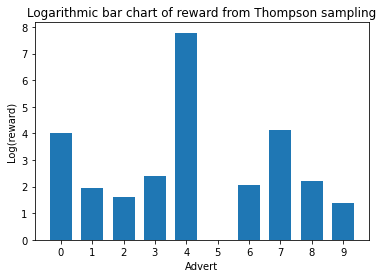

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Reading in data
ds = pd.read_csv('data/Ads_CTR.csv')

N = 10000
d = 10

# Random selection
import random as rn
random_rewards = []

for i in range(20):
    random_reward = 0
    for n in range(N):
        ad = rn.randrange(d)
        random_reward += ds.values[n,ad]
    random_rewards.append(random_reward)

mean_random_reward = np.mean(random_rewards)

## Using the Thompson sampling algorithm

# Sample each distribution once to initialise. 
ads_selected = [i for i in range(d)]
num_rewards_1 = ds.iloc[0,:].tolist() 
num_rewards_0 = list(map(lambda x: 1-x, num_rewards_1))
total_reward = sum(num_rewards_1)

# The lower bound on the range is 1 since we have already initialised.
# For each round, we choose the ad with the maximum theta
for n in range(1, N):
    ad = 0
    max_theta = 0
    
    # For each ad, sample theta from the beta distribution
    for i in range(d):
        theta = np.random.beta(num_rewards_1[i] + 1, num_rewards_0[i]+1)
        if theta > max_theta:
            ad = i
            max_theta = theta
            
    # Choose the ad with maximal theta
    ads_selected.append(ad)
    reward = ds.values[n, ad]
    total_reward += reward
    
    if reward == 1:
        num_rewards_1[ad] += 1
    else:
        num_rewards_0[ad] += 1


# Visualising results on a bar chart

# Take logs
logreward = list(map(lambda x: math.log(x+1), num_rewards_1))

width = 0.7
ind = np.arange(d)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, logreward, width)

ax.set_xlabel('Advert')
ax.set_ylabel('Log(reward)')
ax.set_title('Logarithmic bar chart of reward from Thompson sampling')
ax.set_xticks(ind)

plt.show()